## 1. Load CIFAR-10 Database

In [1]:
import keras
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
# load pre-shuffled train and test data
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 26s 0us/step


## 2. Visualize the first 36 training images

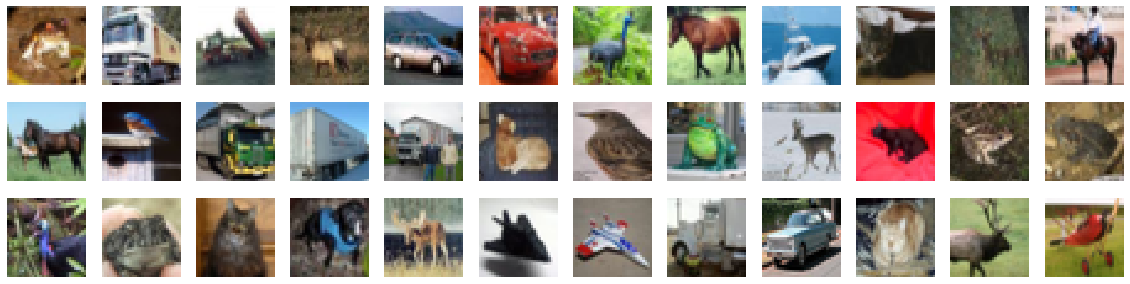

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure(figsize = (20,5))
for i in range(36):
  ax = fig.add_subplot(3,12,i+1,xticks = [],yticks = [])
  ax.imshow(np.squeeze(x_train[i]))

## 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [0]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

## 4. Break Dataset into Training, Testing, and Validation Sets

In [5]:
from keras.utils import to_categorical

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


## 5. Train a MLP (our first model)

In [6]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout 

# define the model
model = Sequential()
model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

          

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 3,590,642
Trainable params: 3,590,642
Non-trainable params: 0
_________________________________________________________________


In [0]:
# compile the model
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='MLP.weights.best.hdf5', verbose=1, 
                               save_best_only=True)

model.fit(x_train, y_train, batch_size=100, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=0, shuffle=True)


Epoch 00001: val_loss improved from inf to 1.70115, saving model to MLP.weights.best.hdf5

Epoch 00002: val_loss improved from 1.70115 to 1.68812, saving model to MLP.weights.best.hdf5

Epoch 00003: val_loss did not improve from 1.68812

Epoch 00004: val_loss improved from 1.68812 to 1.67458, saving model to MLP.weights.best.hdf5

Epoch 00005: val_loss did not improve from 1.67458

Epoch 00006: val_loss did not improve from 1.67458

Epoch 00007: val_loss did not improve from 1.67458

Epoch 00008: val_loss did not improve from 1.67458

Epoch 00009: val_loss improved from 1.67458 to 1.67068, saving model to MLP.weights.best.hdf5

Epoch 00010: val_loss did not improve from 1.67068

Epoch 00011: val_loss did not improve from 1.67068

Epoch 00012: val_loss did not improve from 1.67068

Epoch 00013: val_loss did not improve from 1.67068

Epoch 00014: val_loss did not improve from 1.67068

Epoch 00015: val_loss did not improve from 1.67068

Epoch 00016: val_loss did not improve from 1.67068


In [14]:
# load the weights that yielded the best validation accuracy
model.load_weights('MLP.weights.best.hdf5')

# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.4386


## 6. Train a CNN (our second model)

In [15]:
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense,Dropout

# define the Model Architecture
model2 = Sequential()
model2.add(Convolution2D(filters = 50, kernel_size=2 , 
             padding='same', activation='relu', input_shape=(32, 32, 3)))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Convolution2D(filters=100, kernel_size=2, padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Convolution2D(filters=200, kernel_size=2, padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Dropout(0.4))
model2.add(Flatten())
model2.add(Dense(700, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(10, activation='softmax'))

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 50)        650       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 50)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 100)       20100     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 100)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 200)         80200     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 200)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 200)         0         
__________

In [0]:
# compile the model
model2.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])

In [17]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model2.weights.best.hdf5', verbose=1, 
                               save_best_only=True)

model2.fit(x_train, y_train, batch_size=100, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=0, shuffle=True)


Epoch 00001: val_loss improved from inf to 1.22935, saving model to model2.weights.best.hdf5

Epoch 00002: val_loss improved from 1.22935 to 1.01058, saving model to model2.weights.best.hdf5

Epoch 00003: val_loss improved from 1.01058 to 0.91574, saving model to model2.weights.best.hdf5

Epoch 00004: val_loss improved from 0.91574 to 0.89613, saving model to model2.weights.best.hdf5

Epoch 00005: val_loss improved from 0.89613 to 0.78887, saving model to model2.weights.best.hdf5

Epoch 00006: val_loss improved from 0.78887 to 0.74557, saving model to model2.weights.best.hdf5

Epoch 00007: val_loss improved from 0.74557 to 0.71797, saving model to model2.weights.best.hdf5

Epoch 00008: val_loss improved from 0.71797 to 0.68937, saving model to model2.weights.best.hdf5

Epoch 00009: val_loss improved from 0.68937 to 0.67191, saving model to model2.weights.best.hdf5

Epoch 00010: val_loss did not improve from 0.67191

Epoch 00011: val_loss improved from 0.67191 to 0.66257, saving model 

In [0]:
# load the weights that yielded the best validation accuracy
model2.load_weights('model2.weights.best.hdf5')

In [19]:
# evaluate and print test accuracy
score = model2.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7719


## 7. Visualize Some Predictions

In [0]:
# get predictions on the test set
y_hat = model2.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

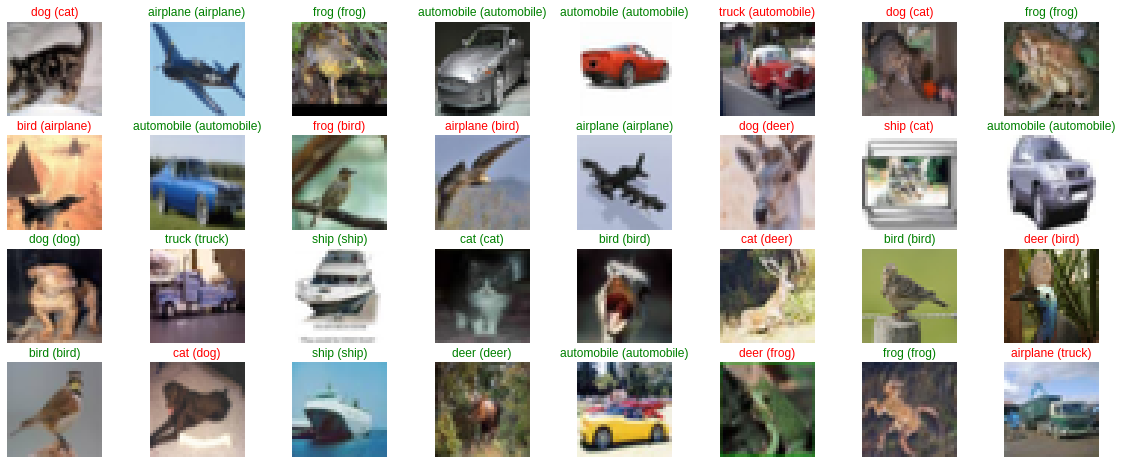

In [21]:
# plot a random sample of test images, their predicted labels, and ground truth

fig = plt.figure(figsize=(20,8))
for i,idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
  ax = fig.add_subplot(4,8,i+1 ,xticks = [], yticks= [])
  ax.imshow(np.squeeze(x_test[idx]))
  pred_idx = np.argmax(y_hat[idx])
  true_idx = np.argmax(y_test[idx])
  
  ax.set_title(f'{cifar10_labels[pred_idx]} ({cifar10_labels[true_idx]})', color=("green" if pred_idx == true_idx else "red")) 

 

## 8.Train a CNN on Augmented images (our Third model)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# create and configure augmented image generator
datagen_train = ImageDataGenerator(
    width_shift_range=0.1,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.1,  # randomly shift images vertically (10% of total height)
    horizontal_flip=True) # randomly flip images horizontally

# fit augmented image generator on data
datagen_train.fit(x_train)

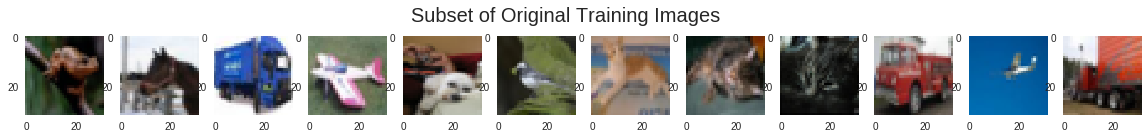

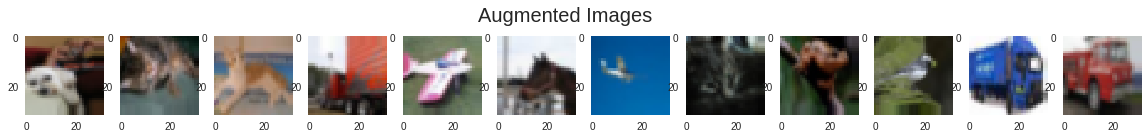

In [23]:
# Visualize Original and Augmented Images
import matplotlib.pyplot as plt

# take subset of training data
x_train_subset = x_train[:12]

# visualize subset of training data
fig = plt.figure(figsize=(20,2))
for i in range(0, len(x_train_subset)):
    ax = fig.add_subplot(1, 12, i+1)
    ax.imshow(x_train_subset[i])
    ax.grid(False)
fig.suptitle('Subset of Original Training Images', fontsize=20)
plt.show()

# visualize augmented images
fig = plt.figure(figsize=(20,2))
for x_batch in datagen_train.flow(x_train_subset, batch_size=12):
    for i in range(0, 12):
        ax = fig.add_subplot(1, 12, i+1)
        ax.imshow(x_batch[i])
        ax.grid(False)
    fig.suptitle('Augmented Images', fontsize=20)
    plt.show()
    break;

In [24]:
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense,Dropout

# define the Model Architecture
model3 = Sequential()
model3.add(Convolution2D(filters = 50, kernel_size=2 , 
             padding='same', activation='relu', input_shape=(32, 32, 3)))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Convolution2D(filters=100, kernel_size=2, padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Convolution2D(filters=200, kernel_size=2, padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.4))
model3.add(Flatten())
model3.add(Dense(700, activation='relu'))
model3.add(Dropout(0.4))
model3.add(Dense(10, activation='softmax'))

model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 50)        650       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 50)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 100)       20100     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 100)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 200)         80200     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 200)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 4, 4, 200)         0         
__________

In [0]:
# compile the model
model3.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])      

In [27]:
from keras.callbacks import ModelCheckpoint   

batch_size = 100
epochs = 100

# train the model
checkpointer = ModelCheckpoint(filepath='aug_model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
model3.fit_generator(datagen_train.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs, verbose=0, callbacks=[checkpointer],
                    validation_data=(x_valid, y_valid),
                    validation_steps=x_valid.shape[0] // batch_size)


Epoch 00001: val_loss improved from inf to 1.34076, saving model to aug_model.weights.best.hdf5

Epoch 00002: val_loss improved from 1.34076 to 1.14125, saving model to aug_model.weights.best.hdf5

Epoch 00003: val_loss improved from 1.14125 to 0.96875, saving model to aug_model.weights.best.hdf5

Epoch 00004: val_loss improved from 0.96875 to 0.93020, saving model to aug_model.weights.best.hdf5

Epoch 00005: val_loss improved from 0.93020 to 0.85120, saving model to aug_model.weights.best.hdf5

Epoch 00006: val_loss did not improve from 0.85120

Epoch 00007: val_loss improved from 0.85120 to 0.81047, saving model to aug_model.weights.best.hdf5

Epoch 00008: val_loss improved from 0.81047 to 0.71803, saving model to aug_model.weights.best.hdf5

Epoch 00009: val_loss did not improve from 0.71803

Epoch 00010: val_loss did not improve from 0.71803

Epoch 00011: val_loss improved from 0.71803 to 0.64975, saving model to aug_model.weights.best.hdf5

Epoch 00012: val_loss improved from 0.6

In [0]:
# load the weights that yielded the best validation accuracy
model3.load_weights('aug_model.weights.best.hdf5')

In [29]:
# evaluate and print test accuracy
score = model3.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.844
